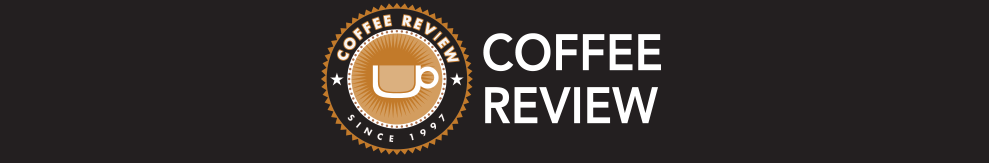

# Data cleaning process for descriptive analisis (Part 2)

### Objective

#### In this stage is analized the information for the scrapping proccess. for this task the following steps are performed in order to obtain a collection of data that is suitable for analysis:


#### -Clean and wrangling the information of the data frame
#### -Realize descriptive analisis of the information collected (RDA)
#### -Builts visualitations of data collected
#### -Realize statictical descriptive for understand the informatio

# 1. Import the libraries and CSV with data collected for scrapping.

### 1.1 Import the libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.preprocessing import RobustScaler
import sklearn
from scipy import stats
import sklearn.model_selection
%matplotlib inline

### 1.2 Import the CSV

In [2]:
df=pd.read_csv('Coffee_.csv')    # import csv file
df.replace('NR', np.nan, inplace=True)

### Exploring the estructure of the data

#### The data coleccted from the web scrapping presenst some null values and two features have more 1500 non - null data, 
#### this columns are dropped for continue de analisis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Roaster Location   1919 non-null   object 
 1   Coffee Origin      1920 non-null   object 
 2   Roast Level        1860 non-null   object 
 3   Agtron             1920 non-null   object 
 4   Est. Price         1912 non-null   object 
 5   Review Date        1920 non-null   object 
 6   Aroma              1891 non-null   float64
 7   Acidity/Structure  1380 non-null   float64
 8   Body               1917 non-null   float64
 9   Flavor             1917 non-null   float64
 10  Aftertaste         1917 non-null   float64
 11  Name               1917 non-null   object 
 12  Roaster            1917 non-null   object 
 13  Rating             1917 non-null   float64
 14  With Milk          323 non-null    float64
 15  Acidity            239 non-null    float64
dtypes: float64(8), object(8)

In [4]:
df.isna().sum()  

Roaster Location        1
Coffee Origin           0
Roast Level            60
Agtron                  0
Est. Price              8
Review Date             0
Aroma                  29
Acidity/Structure     540
Body                    3
Flavor                  3
Aftertaste              3
Name                    3
Roaster                 3
Rating                  3
With Milk            1597
Acidity              1681
dtype: int64

In [5]:
df.head()

,Roaster Location,Coffee Origin,Roast Level,Agtron,Est. Price,Review Date,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,Name,Roaster,Rating,With Milk,Acidity
0,"Henderson, Nevada","Volcan, Panama",Light,64/84,$49.95/8 ounces,July 2021,9.0,9.0,9.0,9.0,8.0,Mojave Vault Series Geisha Natural,Dragonfly Coffee Roasters,94.0,NaN,NaN
1,"Durango, Colorado","Vereda, Huila Province, Colombia",Medium-Light,56/74,$19.95/12 ounces,July 2021,8.0,8.0,8.0,9.0,8.0,Colombia Black Condor,Durango Coffee Company,91.0,NaN,NaN
2,"Hong Kong, China",Brazil; Papua New Guinea; Indonesia,Medium-Light,56/76,HKD $118/200 grams,July 2021,9.0,8.0,9.0,9.0,8.0,Choco Blend,NINETYs Roastery,93.0,NaN,NaN
3,"Madison, Wisconsin","Kabiufa, Eastern Highlands, Papua New Guinea",Light,60/82,$16.00/12 ounces,July 2021,9.0,9.0,9.0,9.0,8.0,Kabiufa Papua New Guinea,JBC Coffee Roasters,94.0,NaN,NaN
4,"New Taipei City, Taiwan","Guji Zone, Oromia Region, Hambela Woreda, Ethi...",Medium-Light,60/78,NT $350/227 grams,July 2021,9.0,9.0,9.0,9.0,8.0,Ethiopia Buku Abela,Home in Harmony,94.0,NaN,NaN


In [6]:
df.shape

(1920, 16)

In [7]:
df.drop(['With Milk', 'Acidity'], axis=1, inplace=True)

In [8]:
df = df[df['Est. Price'].notna()]

In [9]:
df = df[df['Roast Level'].notna()]

In [10]:
df.isna().sum()

Roaster Location       1
Coffee Origin          0
Roast Level            0
Agtron                 0
Est. Price             0
Review Date            0
Aroma                  3
Acidity/Structure    518
Body                   3
Flavor                 3
Aftertaste             3
Name                   3
Roaster                3
Rating                 3
dtype: int64

In [11]:
df.fillna('0')

,Roaster Location,Coffee Origin,Roast Level,Agtron,Est. Price,Review Date,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,Name,Roaster,Rating
0,"Henderson, Nevada","Volcan, Panama",Light,64/84,$49.95/8 ounces,July 2021,9.0,9.0,9.0,9.0,8.0,Mojave Vault Series Geisha Natural,Dragonfly Coffee Roasters,94.0
1,"Durango, Colorado","Vereda, Huila Province, Colombia",Medium-Light,56/74,$19.95/12 ounces,July 2021,8.0,8.0,8.0,9.0,8.0,Colombia Black Condor,Durango Coffee Company,91.0
2,"Hong Kong, China",Brazil; Papua New Guinea; Indonesia,Medium-Light,56/76,HKD $118/200 grams,July 2021,9.0,8.0,9.0,9.0,8.0,Choco Blend,NINETYs Roastery,93.0
3,"Madison, Wisconsin","Kabiufa, Eastern Highlands, Papua New Guinea",Light,60/82,$16.00/12 ounces,July 2021,9.0,9.0,9.0,9.0,8.0,Kabiufa Papua New Guinea,JBC Coffee Roasters,94.0
4,"New Taipei City, Taiwan","Guji Zone, Oromia Region, Hambela Woreda, Ethi...",Medium-Light,60/78,NT $350/227 grams,July 2021,9.0,9.0,9.0,9.0,8.0,Ethiopia Buku Abela,Home in Harmony,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,"Oakville, Ontario, Canada","Central Valley, Costa Rica",Medium-Light,54/76,CAD $17.00/12 ounces,August 2016,8.0,0,9.0,8.0,8.0,Sol Naciente Costa Rica Red Honey,Reunion Island Coffee,91.0
1916,"Boulder, Colorado","Nyeri growing region, south-central Kenya",Medium-Light,56/76,$24.00/12 ounces,August 2016,9.0,0,9.0,9.0,8.0,Kenya Nyeri Chinga Peaberry,Dragonfly Coffee Roasters,93.0
1917,"Floyd, Virginia","Hambela Wamena District, Guji Zone, Oromia Reg...",Light,65/78,$16.00/12 ounces,August 2016,9.0,0,8.0,9.0,9.0,Ethiopia Hambela Washed,Red Rooster Coffee Roaster,94.0
1918,"Floyd, Virginia","Nyeri growing region, south-central Kenya",Medium-Light,54/74,$19.00/12 ounces,August 2016,9.0,0,9.0,9.0,8.0,Milepost Kenya Nyeri Kiamabara,Red Rooster Coffee Roaster,93.0


In [12]:
df.isna().sum()

Roaster Location       1
Coffee Origin          0
Roast Level            0
Agtron                 0
Est. Price             0
Review Date            0
Aroma                  3
Acidity/Structure    518
Body                   3
Flavor                 3
Aftertaste             3
Name                   3
Roaster                3
Rating                 3
dtype: int64

### Exploring the data, Create new column and convert unit of measure and currency

#### For get a better analisis of the coffee in this step the data is standarized especially for the prices of coffee. 
#### The principla task is to change the untis of measure of the prices of coffee.
#### For this is using replace function for pandas and regex for separate the information that is in the column price.

In [13]:
df['Est. Price'].unique()

array(['$49.95/8 ounces', '$19.95/12 ounces', 'HKD $118/200 grams',
       '$16.00/12 ounces', 'NT $350/227 grams', '$18.00/12 ounces',
       '$35.00/8 ounces', 'NT $600/200 grams', '$27.00/12 ounces',
       '¥2980/100 grams', 'NT $800/8 ounces', 'NT $600/8 ounces',
       'NT $380/12 ounces', '$48.00/12 ounces', '$16.00/8 ounces',
       '$87.00/12 ounces', '$28.00/12 ounces', '$25.00/12 ounces',
       'NT $500/150 grams', 'NT $650/150 grams', 'NT $1450/150 grams',
       'NT $350/250 grams', '$25.00/4 ounces', '$45.00/12 ounces',
       '$28.99/12 ounces', '$20.50/12 ounces', '$21.00/12 ounces',
       '$17.90/12 ounces', '$20.00/12 ounces', '$16.95/12 ounces',
       '$15.95/12 ounces', '$29.95/4 ounces', '$15.99/12 ounces',
       '$24.00/12 ounces', 'NT $350/16 ounces', '$17.00/12 ounces',
       '$21.50/12 ounces', '$17.99/16 ounces', '$17.50/12 ounces',
       '$22.50/12 ounces', '¥1,050/100 grams', 'NT $220/8 ounces',
       '$15.99/10 ounces', '$24.95/12 ounces', 'NT $290/8

In [14]:
price= df['Est. Price'].str.split('[/]', expand=True)
price.columns = ['price', 'quantity']
df = pd.concat([df, price], axis=1)


In [15]:
df

,Roaster Location,Coffee Origin,Roast Level,Agtron,Est. Price,Review Date,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,Name,Roaster,Rating,price,quantity
0,"Henderson, Nevada","Volcan, Panama",Light,64/84,$49.95/8 ounces,July 2021,9.0,9.0,9.0,9.0,8.0,Mojave Vault Series Geisha Natural,Dragonfly Coffee Roasters,94.0,$49.95,8 ounces
1,"Durango, Colorado","Vereda, Huila Province, Colombia",Medium-Light,56/74,$19.95/12 ounces,July 2021,8.0,8.0,8.0,9.0,8.0,Colombia Black Condor,Durango Coffee Company,91.0,$19.95,12 ounces
2,"Hong Kong, China",Brazil; Papua New Guinea; Indonesia,Medium-Light,56/76,HKD $118/200 grams,July 2021,9.0,8.0,9.0,9.0,8.0,Choco Blend,NINETYs Roastery,93.0,HKD $118,200 grams
3,"Madison, Wisconsin","Kabiufa, Eastern Highlands, Papua New Guinea",Light,60/82,$16.00/12 ounces,July 2021,9.0,9.0,9.0,9.0,8.0,Kabiufa Papua New Guinea,JBC Coffee Roasters,94.0,$16.00,12 ounces
4,"New Taipei City, Taiwan","Guji Zone, Oromia Region, Hambela Woreda, Ethi...",Medium-Light,60/78,NT $350/227 grams,July 2021,9.0,9.0,9.0,9.0,8.0,Ethiopia Buku Abela,Home in Harmony,94.0,NT $350,227 grams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,"Oakville, Ontario, Canada","Central Valley, Costa Rica",Medium-Light,54/76,CAD $17.00/12 ounces,August 2016,8.0,NaN,9.0,8.0,8.0,Sol Naciente Costa Rica Red Honey,Reunion Island Coffee,91.0,CAD $17.00,12 ounces
1916,"Boulder, Colorado","Nyeri growing region, south-central Kenya",Medium-Light,56/76,$24.00/12 ounces,August 2016,9.0,NaN,9.0,9.0,8.0,Kenya Nyeri Chinga Peaberry,Dragonfly Coffee Roasters,93.0,$24.00,12 ounces
1917,"Floyd, Virginia","Hambela Wamena District, Guji Zone, Oromia Reg...",Light,65/78,$16.00/12 ounces,August 2016,9.0,NaN,8.0,9.0,9.0,Ethiopia Hambela Washed,Red Rooster Coffee Roaster,94.0,$16.00,12 ounces
1918,"Floyd, Virginia","Nyeri growing region, south-central Kenya",Medium-Light,54/74,$19.00/12 ounces,August 2016,9.0,NaN,9.0,9.0,8.0,Milepost Kenya Nyeri Kiamabara,Red Rooster Coffee Roaster,93.0,$19.00,12 ounces


In [16]:
df.drop(['Est. Price'], axis=1, inplace=True)

In [17]:
df

,Roaster Location,Coffee Origin,Roast Level,Agtron,Review Date,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,Name,Roaster,Rating,price,quantity
0,"Henderson, Nevada","Volcan, Panama",Light,64/84,July 2021,9.0,9.0,9.0,9.0,8.0,Mojave Vault Series Geisha Natural,Dragonfly Coffee Roasters,94.0,$49.95,8 ounces
1,"Durango, Colorado","Vereda, Huila Province, Colombia",Medium-Light,56/74,July 2021,8.0,8.0,8.0,9.0,8.0,Colombia Black Condor,Durango Coffee Company,91.0,$19.95,12 ounces
2,"Hong Kong, China",Brazil; Papua New Guinea; Indonesia,Medium-Light,56/76,July 2021,9.0,8.0,9.0,9.0,8.0,Choco Blend,NINETYs Roastery,93.0,HKD $118,200 grams
3,"Madison, Wisconsin","Kabiufa, Eastern Highlands, Papua New Guinea",Light,60/82,July 2021,9.0,9.0,9.0,9.0,8.0,Kabiufa Papua New Guinea,JBC Coffee Roasters,94.0,$16.00,12 ounces
4,"New Taipei City, Taiwan","Guji Zone, Oromia Region, Hambela Woreda, Ethi...",Medium-Light,60/78,July 2021,9.0,9.0,9.0,9.0,8.0,Ethiopia Buku Abela,Home in Harmony,94.0,NT $350,227 grams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,"Oakville, Ontario, Canada","Central Valley, Costa Rica",Medium-Light,54/76,August 2016,8.0,NaN,9.0,8.0,8.0,Sol Naciente Costa Rica Red Honey,Reunion Island Coffee,91.0,CAD $17.00,12 ounces
1916,"Boulder, Colorado","Nyeri growing region, south-central Kenya",Medium-Light,56/76,August 2016,9.0,NaN,9.0,9.0,8.0,Kenya Nyeri Chinga Peaberry,Dragonfly Coffee Roasters,93.0,$24.00,12 ounces
1917,"Floyd, Virginia","Hambela Wamena District, Guji Zone, Oromia Reg...",Light,65/78,August 2016,9.0,NaN,8.0,9.0,9.0,Ethiopia Hambela Washed,Red Rooster Coffee Roaster,94.0,$16.00,12 ounces
1918,"Floyd, Virginia","Nyeri growing region, south-central Kenya",Medium-Light,54/74,August 2016,9.0,NaN,9.0,9.0,8.0,Milepost Kenya Nyeri Kiamabara,Red Rooster Coffee Roaster,93.0,$19.00,12 ounces


In [18]:
quantity= df['quantity'].str.split('[ ]', expand=True)
quantity.columns = ['quantity2', 'unit','unit2']
df = pd.concat([df, quantity], axis=1)


In [19]:
df

,Roaster Location,Coffee Origin,Roast Level,Agtron,Review Date,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,Name,Roaster,Rating,price,quantity,quantity2,unit,unit2
0,"Henderson, Nevada","Volcan, Panama",Light,64/84,July 2021,9.0,9.0,9.0,9.0,8.0,Mojave Vault Series Geisha Natural,Dragonfly Coffee Roasters,94.0,$49.95,8 ounces,8,ounces,None
1,"Durango, Colorado","Vereda, Huila Province, Colombia",Medium-Light,56/74,July 2021,8.0,8.0,8.0,9.0,8.0,Colombia Black Condor,Durango Coffee Company,91.0,$19.95,12 ounces,12,ounces,None
2,"Hong Kong, China",Brazil; Papua New Guinea; Indonesia,Medium-Light,56/76,July 2021,9.0,8.0,9.0,9.0,8.0,Choco Blend,NINETYs Roastery,93.0,HKD $118,200 grams,200,grams,None
3,"Madison, Wisconsin","Kabiufa, Eastern Highlands, Papua New Guinea",Light,60/82,July 2021,9.0,9.0,9.0,9.0,8.0,Kabiufa Papua New Guinea,JBC Coffee Roasters,94.0,$16.00,12 ounces,12,ounces,None
4,"New Taipei City, Taiwan","Guji Zone, Oromia Region, Hambela Woreda, Ethi...",Medium-Light,60/78,July 2021,9.0,9.0,9.0,9.0,8.0,Ethiopia Buku Abela,Home in Harmony,94.0,NT $350,227 grams,227,grams,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,"Oakville, Ontario, Canada","Central Valley, Costa Rica",Medium-Light,54/76,August 2016,8.0,NaN,9.0,8.0,8.0,Sol Naciente Costa Rica Red Honey,Reunion Island Coffee,91.0,CAD $17.00,12 ounces,12,ounces,None
1916,"Boulder, Colorado","Nyeri growing region, south-central Kenya",Medium-Light,56/76,August 2016,9.0,NaN,9.0,9.0,8.0,Kenya Nyeri Chinga Peaberry,Dragonfly Coffee Roasters,93.0,$24.00,12 ounces,12,ounces,None
1917,"Floyd, Virginia","Hambela Wamena District, Guji Zone, Oromia Reg...",Light,65/78,August 2016,9.0,NaN,8.0,9.0,9.0,Ethiopia Hambela Washed,Red Rooster Coffee Roaster,94.0,$16.00,12 ounces,12,ounces,None
1918,"Floyd, Virginia","Nyeri growing region, south-central Kenya",Medium-Light,54/74,August 2016,9.0,NaN,9.0,9.0,8.0,Milepost Kenya Nyeri Kiamabara,Red Rooster Coffee Roaster,93.0,$19.00,12 ounces,12,ounces,None


In [20]:
df.drop(['quantity', 'unit2'], axis=1, inplace=True)


In [21]:
df['price'].unique()

array(['$49.95', '$19.95', 'HKD $118', '$16.00', 'NT $350', '$18.00',
       '$35.00', 'NT $600', '$27.00', '¥2980', 'NT $800', 'NT $380',
       '$48.00', '$87.00', '$28.00', '$25.00', 'NT $500', 'NT $650',
       'NT $1450', '$45.00', '$28.99', '$20.50', '$21.00', '$17.90',
       '$20.00', '$16.95', '$15.95', '$29.95', '$15.99', '$24.00',
       '$17.00', '$21.50', '$17.99', '$17.50', '$22.50', '¥1,050',
       'NT $220', '$24.95', 'NT $290', '$20.49', 'NT $700', 'NT $325',
       'NT $300', 'NT $550', 'NT $450', '$30.00', '$17.95', '$14.00',
       '$22.00', '$24.99', '$15.80', '$24.75', '$19.50', 'NT $420',
       'NT $900', 'NT $320', 'NT $560', '$32.99', 'NT $2200', '$14.74',
       '500 pesos', 'NT $400', 'NT $330', 'NT $250', '$60.00', '$10.00',
       '¥1280', 'NT $210', 'NT $375', 'NT $360', 'NT $390', '$29.00',
       '$19.00', '$12.99', '$16.20', '$18.50', '$23.00', '$87.50',
       '$120.00', '$33.00', '$50.00', '$47.00', '$12.50', 'CAD $18.00',
       'CAD $21.00', '$19.

In [22]:
df

,Roaster Location,Coffee Origin,Roast Level,Agtron,Review Date,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,Name,Roaster,Rating,price,quantity2,unit
0,"Henderson, Nevada","Volcan, Panama",Light,64/84,July 2021,9.0,9.0,9.0,9.0,8.0,Mojave Vault Series Geisha Natural,Dragonfly Coffee Roasters,94.0,$49.95,8,ounces
1,"Durango, Colorado","Vereda, Huila Province, Colombia",Medium-Light,56/74,July 2021,8.0,8.0,8.0,9.0,8.0,Colombia Black Condor,Durango Coffee Company,91.0,$19.95,12,ounces
2,"Hong Kong, China",Brazil; Papua New Guinea; Indonesia,Medium-Light,56/76,July 2021,9.0,8.0,9.0,9.0,8.0,Choco Blend,NINETYs Roastery,93.0,HKD $118,200,grams
3,"Madison, Wisconsin","Kabiufa, Eastern Highlands, Papua New Guinea",Light,60/82,July 2021,9.0,9.0,9.0,9.0,8.0,Kabiufa Papua New Guinea,JBC Coffee Roasters,94.0,$16.00,12,ounces
4,"New Taipei City, Taiwan","Guji Zone, Oromia Region, Hambela Woreda, Ethi...",Medium-Light,60/78,July 2021,9.0,9.0,9.0,9.0,8.0,Ethiopia Buku Abela,Home in Harmony,94.0,NT $350,227,grams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,"Oakville, Ontario, Canada","Central Valley, Costa Rica",Medium-Light,54/76,August 2016,8.0,NaN,9.0,8.0,8.0,Sol Naciente Costa Rica Red Honey,Reunion Island Coffee,91.0,CAD $17.00,12,ounces
1916,"Boulder, Colorado","Nyeri growing region, south-central Kenya",Medium-Light,56/76,August 2016,9.0,NaN,9.0,9.0,8.0,Kenya Nyeri Chinga Peaberry,Dragonfly Coffee Roasters,93.0,$24.00,12,ounces
1917,"Floyd, Virginia","Hambela Wamena District, Guji Zone, Oromia Reg...",Light,65/78,August 2016,9.0,NaN,8.0,9.0,9.0,Ethiopia Hambela Washed,Red Rooster Coffee Roaster,94.0,$16.00,12,ounces
1918,"Floyd, Virginia","Nyeri growing region, south-central Kenya",Medium-Light,54/74,August 2016,9.0,NaN,9.0,9.0,8.0,Milepost Kenya Nyeri Kiamabara,Red Rooster Coffee Roaster,93.0,$19.00,12,ounces


In [23]:
df['Roast Level'].unique()

array(['Light', 'Medium-Light', 'Medium', 'Medium-Dark', 'Dark',
       'Very Dark'], dtype=object)

In [24]:
df['Aroma'].unique()

array([ 9.,  8.,  7., 10., nan])

In [25]:
df['Acidity/Structure'].unique()

array([ 9.,  8., nan,  7., 10.,  6.])

In [26]:
df['unit'].unique()

array(['ounces', 'grams', 'tin', '7', 'kilo', 'pounds', 'gram',
       'capsules', 'kilogram'], dtype=object)

In [27]:
df['Flavor'].unique()

array([ 9.,  8., 10.,  7., nan])

In [28]:
df['Acidity/Structure'].unique()	

array([ 9.,  8., nan,  7., 10.,  6.])

In [29]:
df.describe()

,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,Rating
count,1851.000000,1336.000000,1851.000000,1851.000000,1851.000000,1851.000000
mean,8.812534,8.479790,8.568882,8.940032,8.089141,92.922744
std,0.449594,0.559196,0.513582,0.383683,0.490059,1.667488
min,7.000000,6.000000,6.000000,7.000000,6.000000,83.000000
25%,9.000000,8.000000,8.000000,9.000000,8.000000,92.000000
50%,9.000000,9.000000,9.000000,9.000000,8.000000,93.000000
75%,9.000000,9.000000,9.000000,9.000000,8.000000,94.000000
max,10.000000,10.000000,10.000000,10.000000,9.000000,98.000000


In [30]:
df['currency'] = df['price'].str.extract(('([a-zA-Z]\w{0,})'),expand = True)
df['currency']

0       NaN
1       NaN
2       HKD
3       NaN
4        NT
       ... 
1915    CAD
1916    NaN
1917    NaN
1918    NaN
1919    NaN
Name: currency, Length: 1854, dtype: object

In [31]:
df['currency'].unique()

array([nan, 'HKD', 'NT', 'pesos', 'CAD', 'USD', 'US', 'HK', 'LAK', 'IDR',
       'AUD', 'AED', 'NTD', 'Euros', 'KRW', 'THB', 'RMB'], dtype=object)

In [32]:
df['price_'] = df['price'].str.extract(('([\D])'),expand = True)
df['price_']



0       $
1       $
2       H
3       $
4       N
       ..
1915    C
1916    $
1917    $
1918    $
1919    $
Name: price_, Length: 1854, dtype: object

In [33]:
df['price_'].unique()

array(['$', 'H', 'N', '¥', ' ', 'C', 'U', '€', 'I', 'A', '.', '£', 'K',
       'T', 'R'], dtype=object)

In [34]:
df['price2'] = df['price'].str.extract(('(\d+(?:\.\d+)?)'), expand = True)
df['price2']


0       49.95
1       19.95
2         118
3       16.00
4         350
        ...  
1915    17.00
1916    24.00
1917    16.00
1918    19.00
1919    16.00
Name: price2, Length: 1854, dtype: object

In [35]:
agtron= df['Agtron'].str.split('[/]', expand=True)
agtron.columns = ['agtron', 'agtron escale']
df = pd.concat([df, agtron], axis=1)


In [36]:
df.drop(['Agtron'], axis=1, inplace=True)

In [37]:
df['agtron'].unique()

array(['64', '56', '60', '58', '63', '62', '82', '42', '40', '57', '52',
       '49', '50', '53', '54', '74', '46', '59', '55', '48', '66', '47',
       '45', '51', '85', '79', '5252', '44', '547', '68', '555', '61',
       '36', '67', '43', '41', '31', '38', '39', '69', '37', '71', '',
       '65', '0', '34', '32', '70'], dtype=object)

In [38]:
df['agtron'] = df['agtron'].replace([''],'0')

In [39]:
df['agtron'] = df['agtron'].astype(float)

In [40]:
df['agtron escale'] = df['agtron escale'].astype(float)

### Change Currency of coffee prices to EUR

#### One the information is separated the next step is standarized the units of measure, 
#### specially currency and weight

In [41]:
df['price_'] = df['price_'].replace(['N'],'0.030')
df['price_'] = df['price_'].replace(['$'],'0.85')
df['price_'] = df['price_'].replace(['H'],'0.11')
df['price_'] = df['price_'].replace(['U'],'0.85')
df['price_'] = df['price_'].replace(['I'],'0.000058')
df['price_'] = df['price_'].replace(['A'],'0.62')
df['price_'] = df['price_'].replace(['K'],'0.00073')
df['price_'] = df['price_'].replace(['R'],'0.13')
df['price_'] = df['price_'].replace(['C'],'0.11')
df['price_'] = df['price_'].replace(['T'],'0.030')
df['price_'] = df['price_'].replace(['¥'],'0.0077')
df['price_'] = df['price_'].replace(['£'],'1.17')
df['price_'] = df['price_'].replace([' '],'0.85')
df['price_'] = df['price_'].replace(['.'],'0.85')
df['price_'] = df['price_'].replace(['€'],'0.85')
df['price_'] = df['price_'].replace(['nan'],'0.85')



In [42]:
df['price_'].unique()

array(['0.85', '0.11', '0.030', '0.0077', '0.000058', '0.62', '1.17',
       '0.00073', '0.13'], dtype=object)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854 entries, 0 to 1919
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Roaster Location   1853 non-null   object 
 1   Coffee Origin      1854 non-null   object 
 2   Roast Level        1854 non-null   object 
 3   Review Date        1854 non-null   object 
 4   Aroma              1851 non-null   float64
 5   Acidity/Structure  1336 non-null   float64
 6   Body               1851 non-null   float64
 7   Flavor             1851 non-null   float64
 8   Aftertaste         1851 non-null   float64
 9   Name               1851 non-null   object 
 10  Roaster            1851 non-null   object 
 11  Rating             1851 non-null   float64
 12  price              1854 non-null   object 
 13  quantity2          1854 non-null   object 
 14  unit               1854 non-null   object 
 15  currency           433 non-null    object 
 16  price_             1854 

In [44]:
df['price2'] = df['price2'].astype(float)

In [45]:
df['price_'] = df['price_'].astype(float)

In [46]:
df['euro'] = df.price_ * df.price2

In [47]:
df['unit'].unique()

array(['ounces', 'grams', 'tin', '7', 'kilo', 'pounds', 'gram',
       'capsules', 'kilogram'], dtype=object)

In [48]:
df['unit'] = df['unit'].replace(['ounces'],'28.70')
df['unit'] = df['unit'].replace(['grams'],'1.00')
df['unit'] = df['unit'].replace(['bottle'],'220.0')
df['unit'] = df['unit'].replace(['bottles'],'220.0')
df['unit'] = df['unit'].replace(['ml'],'1.00')
df['unit'] = df['unit'].replace(['can'],'220.00')
df['unit'] = df['unit'].replace(['bottle'],'220.0')
df['unit'] = df['unit'].replace(['7'],'7.0')
df['unit'] = df['unit'].replace(['12-ounce'],'12.0')
df['unit'] = df['unit'].replace(['16'],'16.0')
df['unit'] = df['unit'].replace(['tin'],'250.0')
df['unit'] = df['unit'].replace(['6-ounce;'],'28.70')
df['unit'] = df['unit'].replace(['8-ounce'],'28.70')
df['unit'] = df['unit'].replace(['9.5-ounce'],'28.70')
df['unit'] = df['unit'].replace(['ounces.'],'28.70')
df['unit'] = df['unit'].replace(['onces'],'28.70')
df['unit'] = df['unit'].replace(['gram'],'1.00')
df['unit'] = df['unit'].replace(['kilogram'],'1')
df['unit'] = df['unit'].replace(['oz.'],'28.70')
df['unit'] = df['unit'].replace(['g'],'1.00')
df['unit'] = df['unit'].replace(['fluid'],'220')
df['unit'] = df['unit'].replace(['5'],'5.0')
df['unit'] = df['unit'].replace(['250'],'250.0')
df['unit'] = df['unit'].replace(['capsules'],'210.0')
df['unit'] = df['unit'].replace(['12-ounces'],'220.0')
df['unit'] = df['unit'].replace(['kilo'],'220.0')
df['unit'] = df['unit'].replace(['sticks'],'3.0')
df['unit'] = df['unit'].replace(['None'],'220.0')
df['unit'] = df['unit'].replace(['5'],'5.0')
df['unit'] = df['unit'].replace(['ounce'],'28.70')
df['unit'] = df['unit'].replace(['6-ounce'],'180.0')
df['unit'] = df['unit'].replace(['ml.'],'1')
df['unit'] = df['unit'].replace(['pounds'],'453.0')

In [49]:
df['quantity2'].unique()


array(['8', '12', '200', '227', '100', '150', '250', '4', '16', '10',
       '300', '225', '150-gram', '7', '11', '220', '6', '230', '12.64',
       '500', '50', '455', '454', '460', '115', '20', '30', '14', '450',
       '2', '222', '340', '', '1', '22', '32', '18', '21', '400', '3',
       '120', '113.5', '3.4'], dtype=object)

In [50]:
df['quantity2'] = df['quantity2'].replace(['160-ml'],'160')
df['quantity2'] = df['quantity2'].replace(['200-ml'],'160')
df['quantity2'] = df['quantity2'].replace(['12-ounce'],'12')
df['quantity2'] = df['quantity2'].replace(['150-gram'],'150')
df['quantity2'] = df['quantity2'].replace(['8-ounce'],'160')
df['quantity2'] = df['quantity2'].replace(['can'],'1')
df['quantity2'] = df['quantity2'].replace(['8.4-ounce'],'8.4')
df['quantity2'] = df['quantity2'].replace(['25.4-ounce'],'25.4')
df['quantity2'] = df['quantity2'].replace(['six'],'6')
df['quantity2'] = df['quantity2'].replace(['four'],'4')
df['quantity2'] = df['quantity2'].replace(['twelve'],'12')
df['quantity2'] = df['quantity2'].replace(['can'],'100')
df['quantity2'] = df['quantity2'].replace(['82ounce'],'82')
df['quantity2'] = df['quantity2'].replace(['10.5-ounce'],'10.5')
df['quantity2'] = df['quantity2'].replace(['sachet'],'34')
df['quantity2'] = df['quantity2'].replace(['150-gram'],'150')
df['quantity2'] = df['quantity2'].replace(['8.4-ounce'],'12')
df['quantity2'] = df['quantity2'].replace(['25.4-ounce'],'12')
df['quantity2'] = df['quantity2'].replace(['11-ounce'],'12')
df['quantity2'] = df['quantity2'].replace(['10-ounce'],'12')
df['quantity2'] = df['quantity2'].replace([''],'0')
df['quantity2'] = df['quantity2'].replace(['150-gram'],'150')


In [51]:
df['quantity2'] = df['quantity2'].astype(float)

In [52]:
df['unit'] = df['unit'].astype(float)

In [53]:
df['unit_g'] = df.quantity2 * df.unit

In [54]:
df

,Roaster Location,Coffee Origin,Roast Level,Review Date,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,Name,...,price,quantity2,unit,currency,price_,price2,agtron,agtron escale,euro,unit_g
0,"Henderson, Nevada","Volcan, Panama",Light,July 2021,9.0,9.0,9.0,9.0,8.0,Mojave Vault Series Geisha Natural,...,$49.95,8.0,28.7,NaN,0.85,49.95,64.0,84.0,42.4575,229.6
1,"Durango, Colorado","Vereda, Huila Province, Colombia",Medium-Light,July 2021,8.0,8.0,8.0,9.0,8.0,Colombia Black Condor,...,$19.95,12.0,28.7,NaN,0.85,19.95,56.0,74.0,16.9575,344.4
2,"Hong Kong, China",Brazil; Papua New Guinea; Indonesia,Medium-Light,July 2021,9.0,8.0,9.0,9.0,8.0,Choco Blend,...,HKD $118,200.0,1.0,HKD,0.11,118.00,56.0,76.0,12.9800,200.0
3,"Madison, Wisconsin","Kabiufa, Eastern Highlands, Papua New Guinea",Light,July 2021,9.0,9.0,9.0,9.0,8.0,Kabiufa Papua New Guinea,...,$16.00,12.0,28.7,NaN,0.85,16.00,60.0,82.0,13.6000,344.4
4,"New Taipei City, Taiwan","Guji Zone, Oromia Region, Hambela Woreda, Ethi...",Medium-Light,July 2021,9.0,9.0,9.0,9.0,8.0,Ethiopia Buku Abela,...,NT $350,227.0,1.0,NT,0.03,350.00,60.0,78.0,10.5000,227.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,"Oakville, Ontario, Canada","Central Valley, Costa Rica",Medium-Light,August 2016,8.0,NaN,9.0,8.0,8.0,Sol Naciente Costa Rica Red Honey,...,CAD $17.00,12.0,28.7,CAD,0.11,17.00,54.0,76.0,1.8700,344.4
1916,"Boulder, Colorado","Nyeri growing region, south-central Kenya",Medium-Light,August 2016,9.0,NaN,9.0,9.0,8.0,Kenya Nyeri Chinga Peaberry,...,$24.00,12.0,28.7,NaN,0.85,24.00,56.0,76.0,20.4000,344.4
1917,"Floyd, Virginia","Hambela Wamena District, Guji Zone, Oromia Reg...",Light,August 2016,9.0,NaN,8.0,9.0,9.0,Ethiopia Hambela Washed,...,$16.00,12.0,28.7,NaN,0.85,16.00,65.0,78.0,13.6000,344.4
1918,"Floyd, Virginia","Nyeri growing region, south-central Kenya",Medium-Light,August 2016,9.0,NaN,9.0,9.0,8.0,Milepost Kenya Nyeri Kiamabara,...,$19.00,12.0,28.7,NaN,0.85,19.00,54.0,74.0,16.1500,344.4


In [55]:
df.drop(['unit', 'price_', 'price2','price'], axis=1, inplace=True)

In [56]:
df['euro/gr'] = df.euro / df.unit_g

In [57]:
#df.drop(['unit_g'], axis=1, inplace=True)

In [58]:
df

,Roaster Location,Coffee Origin,Roast Level,Review Date,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,Name,Roaster,Rating,quantity2,currency,agtron,agtron escale,euro,unit_g,euro/gr
0,"Henderson, Nevada","Volcan, Panama",Light,July 2021,9.0,9.0,9.0,9.0,8.0,Mojave Vault Series Geisha Natural,Dragonfly Coffee Roasters,94.0,8.0,NaN,64.0,84.0,42.4575,229.6,0.184919
1,"Durango, Colorado","Vereda, Huila Province, Colombia",Medium-Light,July 2021,8.0,8.0,8.0,9.0,8.0,Colombia Black Condor,Durango Coffee Company,91.0,12.0,NaN,56.0,74.0,16.9575,344.4,0.049238
2,"Hong Kong, China",Brazil; Papua New Guinea; Indonesia,Medium-Light,July 2021,9.0,8.0,9.0,9.0,8.0,Choco Blend,NINETYs Roastery,93.0,200.0,HKD,56.0,76.0,12.9800,200.0,0.064900
3,"Madison, Wisconsin","Kabiufa, Eastern Highlands, Papua New Guinea",Light,July 2021,9.0,9.0,9.0,9.0,8.0,Kabiufa Papua New Guinea,JBC Coffee Roasters,94.0,12.0,NaN,60.0,82.0,13.6000,344.4,0.039489
4,"New Taipei City, Taiwan","Guji Zone, Oromia Region, Hambela Woreda, Ethi...",Medium-Light,July 2021,9.0,9.0,9.0,9.0,8.0,Ethiopia Buku Abela,Home in Harmony,94.0,227.0,NT,60.0,78.0,10.5000,227.0,0.046256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,"Oakville, Ontario, Canada","Central Valley, Costa Rica",Medium-Light,August 2016,8.0,NaN,9.0,8.0,8.0,Sol Naciente Costa Rica Red Honey,Reunion Island Coffee,91.0,12.0,CAD,54.0,76.0,1.8700,344.4,0.005430
1916,"Boulder, Colorado","Nyeri growing region, south-central Kenya",Medium-Light,August 2016,9.0,NaN,9.0,9.0,8.0,Kenya Nyeri Chinga Peaberry,Dragonfly Coffee Roasters,93.0,12.0,NaN,56.0,76.0,20.4000,344.4,0.059233
1917,"Floyd, Virginia","Hambela Wamena District, Guji Zone, Oromia Reg...",Light,August 2016,9.0,NaN,8.0,9.0,9.0,Ethiopia Hambela Washed,Red Rooster Coffee Roaster,94.0,12.0,NaN,65.0,78.0,13.6000,344.4,0.039489
1918,"Floyd, Virginia","Nyeri growing region, south-central Kenya",Medium-Light,August 2016,9.0,NaN,9.0,9.0,8.0,Milepost Kenya Nyeri Kiamabara,Red Rooster Coffee Roaster,93.0,12.0,NaN,54.0,74.0,16.1500,344.4,0.046893


### Dealing with NaN

In [59]:
df.isna()

,Roaster Location,Coffee Origin,Roast Level,Review Date,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,Name,Roaster,Rating,quantity2,currency,agtron,agtron escale,euro,unit_g,euro/gr
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1916,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
1917,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
1918,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False


In [60]:
#df=df.dropna(0)   # drop rows with nan values

### Exploring data 

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854 entries, 0 to 1919
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Roaster Location   1853 non-null   object 
 1   Coffee Origin      1854 non-null   object 
 2   Roast Level        1854 non-null   object 
 3   Review Date        1854 non-null   object 
 4   Aroma              1851 non-null   float64
 5   Acidity/Structure  1336 non-null   float64
 6   Body               1851 non-null   float64
 7   Flavor             1851 non-null   float64
 8   Aftertaste         1851 non-null   float64
 9   Name               1851 non-null   object 
 10  Roaster            1851 non-null   object 
 11  Rating             1851 non-null   float64
 12  quantity2          1854 non-null   float64
 13  currency           433 non-null    object 
 14  agtron             1854 non-null   float64
 15  agtron escale      1854 non-null   float64
 16  euro               1854 

In [62]:
df.drop(['currency'], axis=1, inplace=True)#drop price to

In [63]:
df['euro/gr'] = df['euro/gr'].astype(float)

In [64]:
df.describe()

,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,Rating,quantity2,agtron,agtron escale,euro,unit_g,euro/gr
count,1851.000000,1336.000000,1851.000000,1851.000000,1851.000000,1851.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,8.812534,8.479790,8.568882,8.940032,8.089141,92.922744,45.363635,57.988673,74.336570,18.999317,328.645424,inf
std,0.449594,0.559196,0.513582,0.383683,0.490059,1.667488,88.402309,121.922473,7.452167,21.705954,873.031157,NaN
min,7.000000,6.000000,6.000000,7.000000,6.000000,83.000000,0.000000,0.000000,37.000000,0.006960,0.000000,0.000028
25%,9.000000,8.000000,8.000000,9.000000,8.000000,92.000000,12.000000,52.000000,71.000000,12.750000,229.600000,0.039242
50%,9.000000,9.000000,9.000000,9.000000,8.000000,93.000000,12.000000,55.000000,76.000000,15.300000,344.400000,0.046893
75%,9.000000,9.000000,9.000000,9.000000,8.000000,94.000000,12.000000,58.000000,78.000000,18.700000,344.400000,0.064900
max,10.000000,10.000000,10.000000,10.000000,9.000000,98.000000,500.000000,5252.000000,105.000000,595.000000,37500.000000,inf


In [65]:
df['euro/gr'].unique()

array([1.84919425e-01, 4.92378049e-02, 6.49000000e-02, 3.94889663e-02,
       4.62555066e-02, 4.44250871e-02, 1.29573171e-01, 9.00000000e-02,
       6.66376307e-02, 2.29460000e-01, 1.04529617e-01, 7.83972125e-02,
       3.31010453e-02, 1.18466899e-01, 5.92334495e-02, 2.14721254e-01,
       6.91056911e-02, 6.17015099e-02, 1.00000000e-01, 1.30000000e-01,
       2.90000000e-01, 4.20000000e-02, 1.85104530e-01, 1.11062718e-01,
       7.15490708e-02, 5.05952381e-02, 5.18292683e-02, 4.41782811e-02,
       4.93612079e-02, 4.18336237e-02, 3.93655633e-02, 2.21755226e-01,
       3.94642857e-02, 2.28658537e-02, 4.19570267e-02, 5.30632985e-02,
       3.33003049e-02, 4.31910569e-02, 5.55313589e-02, 7.70000000e-05,
       2.87456446e-02, 4.73571429e-02, 6.15781069e-02, 3.78919861e-02,
       5.05705575e-02, 1.82926829e-01, 4.24651568e-02, 3.91986063e-02,
       7.50000000e-02, 8.25000000e-02, 6.75000000e-02, 8.50000000e-02,
       4.43016841e-02, 3.45528455e-02, 5.42973287e-02, 6.16768293e-02,
      

In [66]:
df['euro/gr'].apply(np.isinf)

0       False
1       False
2       False
3       False
4       False
        ...  
1915    False
1916    False
1917    False
1918    False
1919    False
Name: euro/gr, Length: 1854, dtype: bool

In [67]:
df[df['euro/gr'].apply(np.isinf)]

,Roaster Location,Coffee Origin,Roast Level,Review Date,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,Name,Roaster,Rating,quantity2,agtron,agtron escale,euro,unit_g,euro/gr
719,"Holualoa, Hawaii","Kona, Hawaii",Medium-Light,February 2020,9.0,9.0,9.0,9.0,8.0,Kona Laurina Pointu,Kona Farm Direct,94.0,0.0,56.0,70.0,42.5,0.0,inf


In [68]:
df.drop([719],axis=0, inplace=True)

In [69]:
df[df['euro/gr'].apply(np.isinf)]

,Roaster Location,Coffee Origin,Roast Level,Review Date,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,Name,Roaster,Rating,quantity2,agtron,agtron escale,euro,unit_g,euro/gr


# Visualization of clean data

#### Once is finish the the cleaning and wrangling procces the data is checked for descrictive analisis.
#### In the description is notes that the mean in features like Aroma, Body, Flavor and Aftertaste is rounding 8 points, 
#### so for this review of coffees from 85 to 98 points is very similar but is better to contrast whit other features.

In [70]:
df.describe()

,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,Rating,quantity2,agtron,agtron escale,euro,unit_g,euro/gr
count,1850.000000,1335.000000,1850.000000,1850.000000,1850.000000,1850.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000
mean,8.812432,8.479401,8.568649,8.940000,8.089189,92.922162,45.388117,57.989746,74.338910,18.986634,328.822783,0.086416
std,0.449694,0.559224,0.513623,0.383784,0.490187,1.667750,88.419885,121.955376,7.453497,21.704942,873.233414,0.421367
min,7.000000,6.000000,6.000000,7.000000,6.000000,83.000000,1.000000,0.000000,37.000000,0.006960,1.000000,0.000028
25%,9.000000,8.000000,8.000000,9.000000,8.000000,92.000000,12.000000,52.000000,71.000000,12.750000,229.600000,0.039242
50%,9.000000,9.000000,9.000000,9.000000,8.000000,93.000000,12.000000,55.000000,76.000000,15.300000,344.400000,0.046893
75%,9.000000,9.000000,9.000000,9.000000,8.000000,94.000000,12.000000,58.000000,78.000000,18.700000,344.400000,0.064900
max,10.000000,10.000000,10.000000,10.000000,9.000000,98.000000,500.000000,5252.000000,105.000000,595.000000,37500.000000,16.500000


In [71]:
df.to_csv (r'C:\Users\Fernando\Desktop\Jupyter_files\coffee_2.csv', index = False)

## Get numeric data

In [72]:
data_num=df.select_dtypes(include=np.number)
data_cat = df[set(df.columns) - set(data_num.columns)]

# Get Categoricals

In [73]:
data_cat.head()

,Coffee Origin,Roaster Location,Roast Level,Name,Roaster,Review Date
0,"Volcan, Panama","Henderson, Nevada",Light,Mojave Vault Series Geisha Natural,Dragonfly Coffee Roasters,July 2021
1,"Vereda, Huila Province, Colombia","Durango, Colorado",Medium-Light,Colombia Black Condor,Durango Coffee Company,July 2021
2,Brazil; Papua New Guinea; Indonesia,"Hong Kong, China",Medium-Light,Choco Blend,NINETYs Roastery,July 2021
3,"Kabiufa, Eastern Highlands, Papua New Guinea","Madison, Wisconsin",Light,Kabiufa Papua New Guinea,JBC Coffee Roasters,July 2021
4,"Guji Zone, Oromia Region, Hambela Woreda, Ethi...","New Taipei City, Taiwan",Medium-Light,Ethiopia Buku Abela,Home in Harmony,July 2021


In [74]:
#df.sort_values(by='roaster', ascending=False)

In [75]:
#cat_cols=[col for col in df.columns if (df[col].dtype==object)] 

# Check Normality visually

### Rda stage

array([[<AxesSubplot:title={'center':'Aroma'}>,
        <AxesSubplot:title={'center':'Acidity/Structure'}>,
        <AxesSubplot:title={'center':'Body'}>,
        <AxesSubplot:title={'center':'Flavor'}>,
        <AxesSubplot:title={'center':'Aftertaste'}>,
        <AxesSubplot:title={'center':'Rating'}>],
       [<AxesSubplot:title={'center':'quantity2'}>,
        <AxesSubplot:title={'center':'agtron'}>,
        <AxesSubplot:title={'center':'agtron escale'}>,
        <AxesSubplot:title={'center':'euro'}>,
        <AxesSubplot:title={'center':'unit_g'}>,
        <AxesSubplot:title={'center':'euro/gr'}>]], dtype=object)

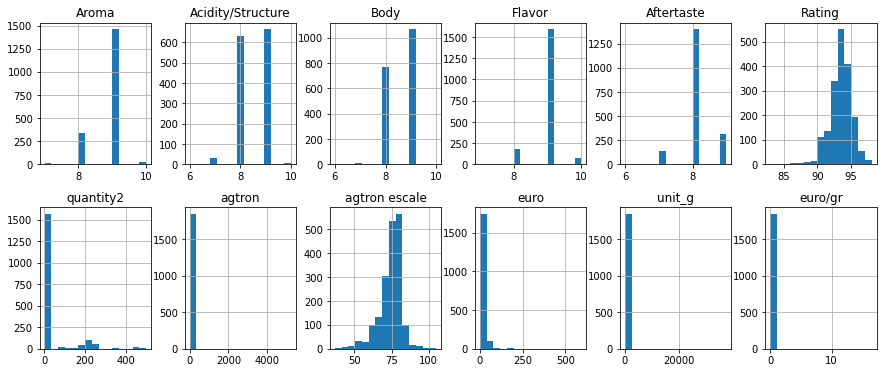

In [76]:
data_num.hist(bins=15, figsize=(15, 6), layout=(2, 6))

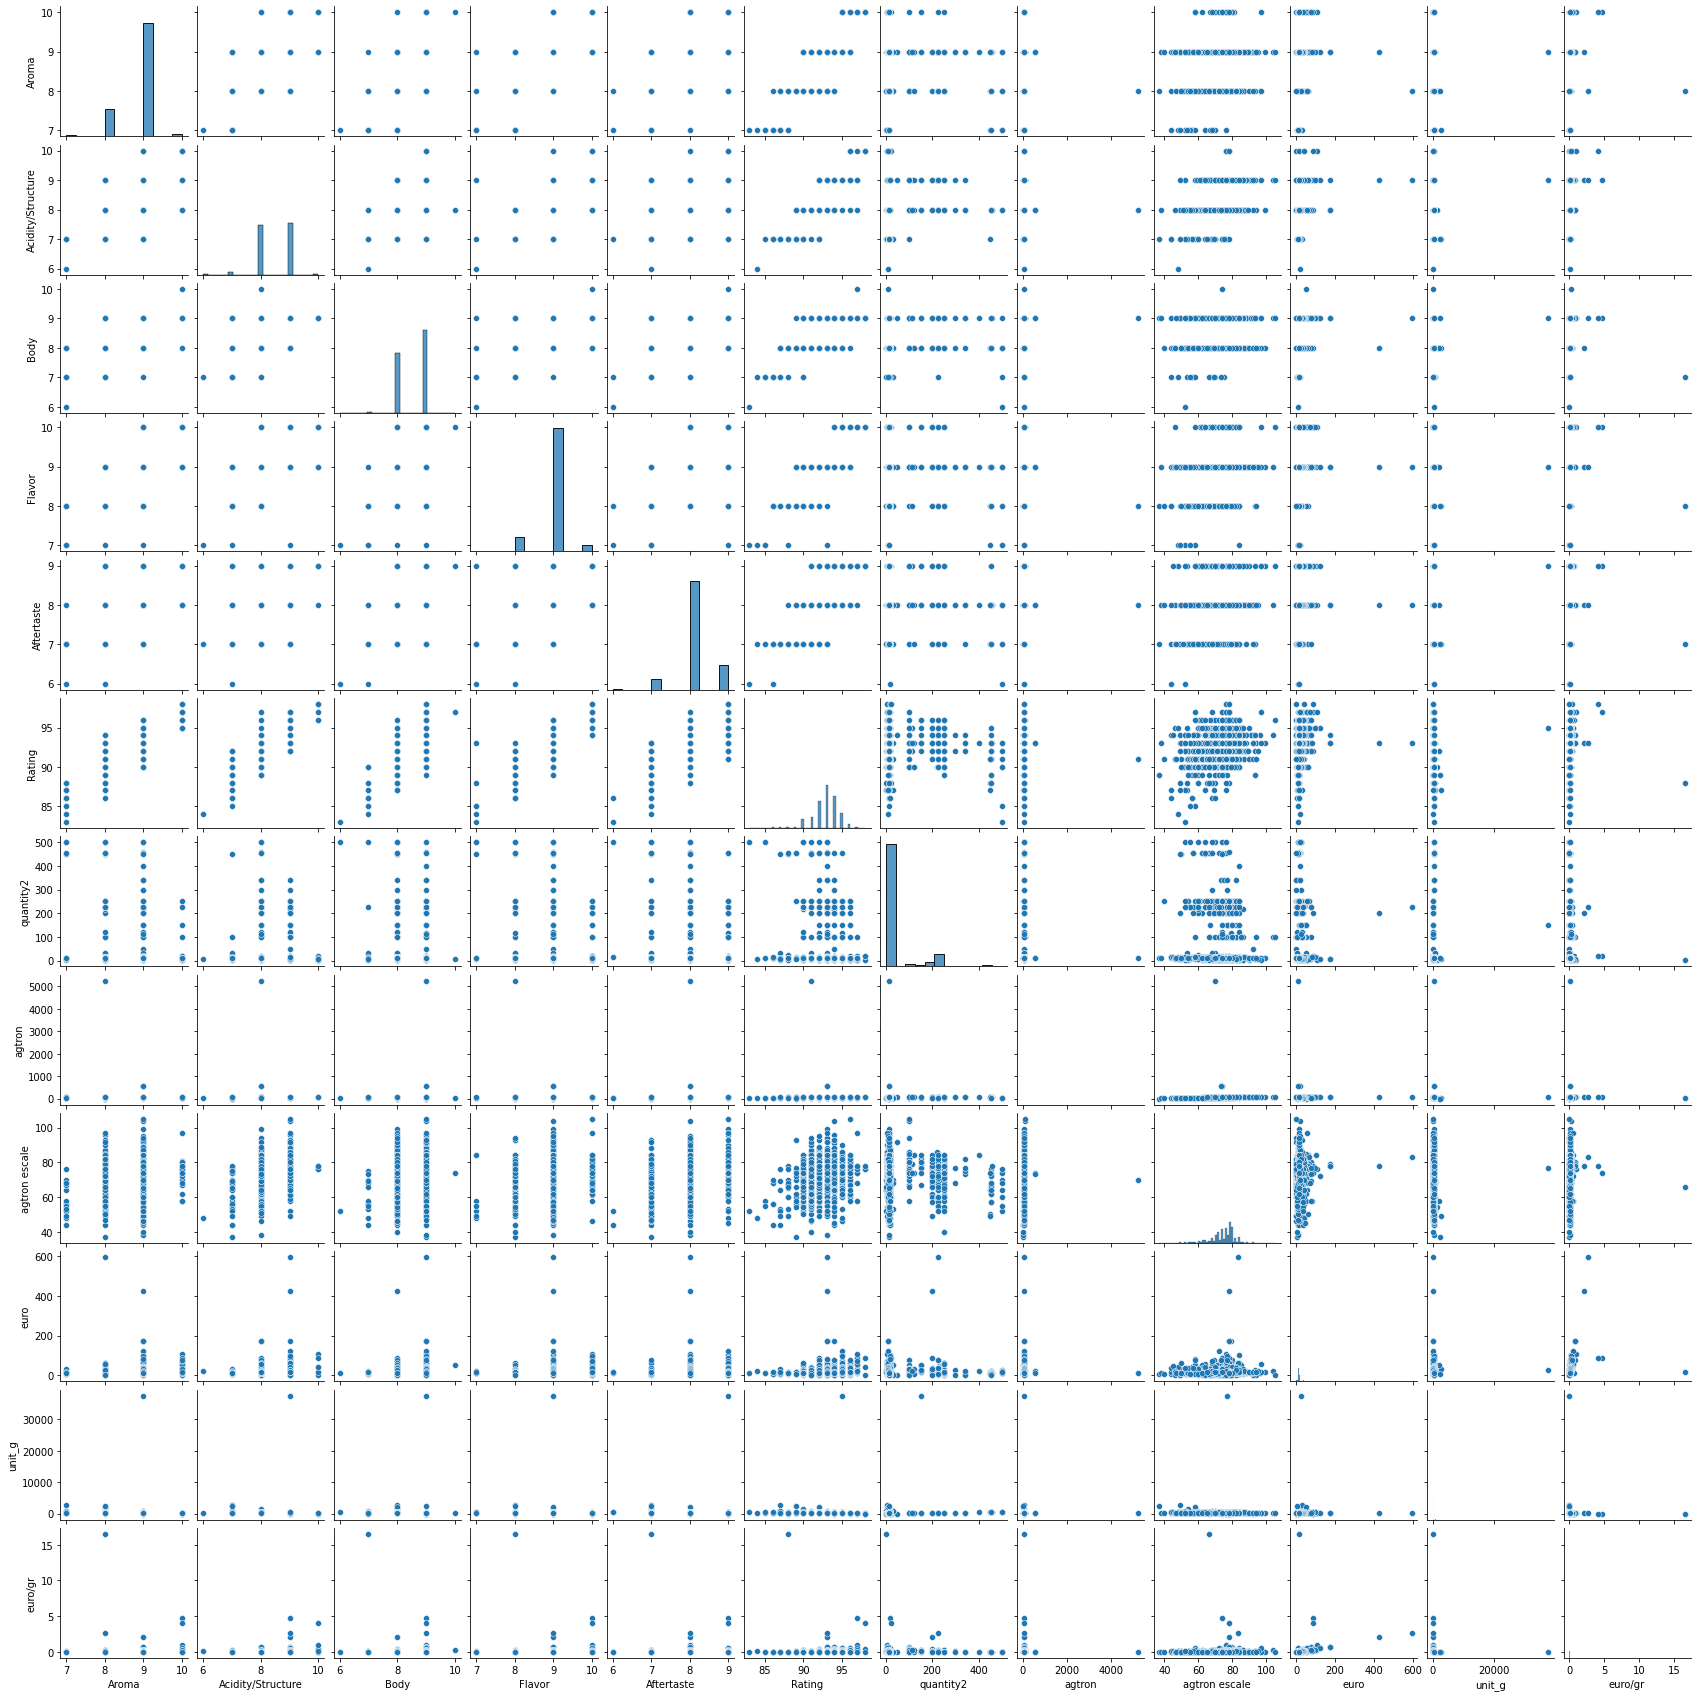

In [77]:
sns.pairplot(data_num, height=2)

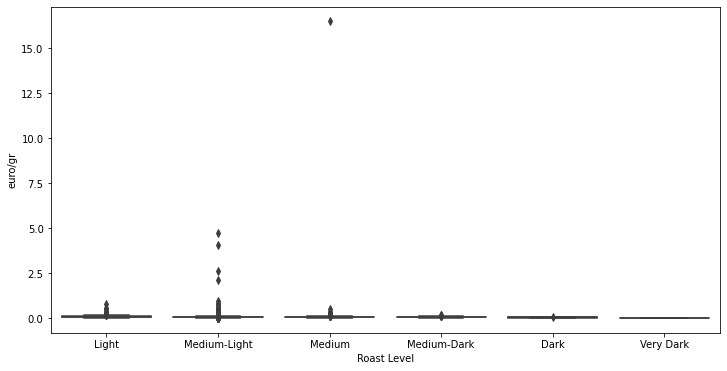

In [78]:
plt.figure(figsize=(12,6))
sns.boxplot(y='euro/gr' , x='Roast Level', data=df)
plt.ylabel('euro/gr')
plt.show()

No handles with labels found to put in legend.


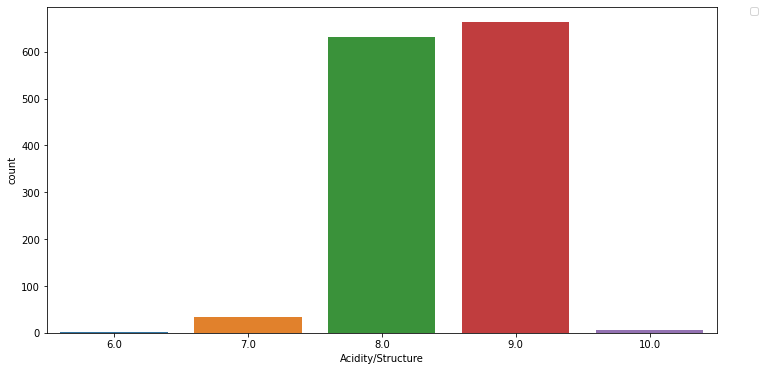

In [79]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Acidity/Structure')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

No handles with labels found to put in legend.


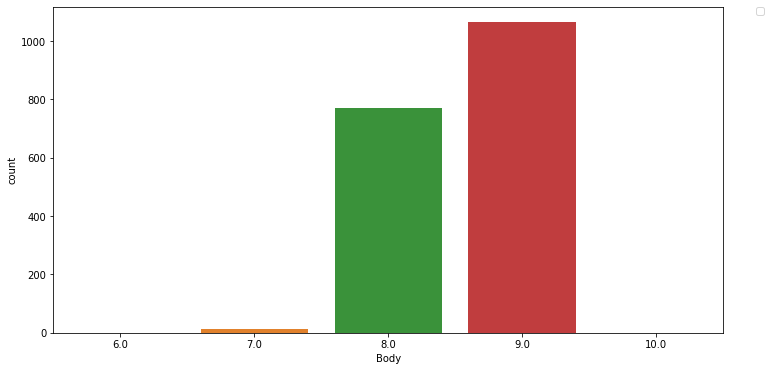

In [80]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Body')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

No handles with labels found to put in legend.


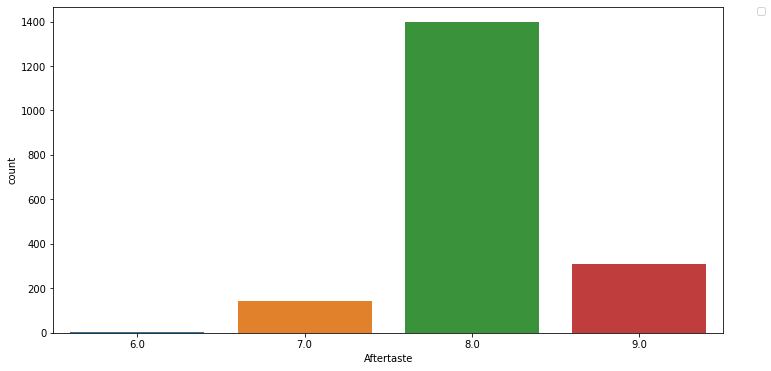

In [81]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Aftertaste');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

No handles with labels found to put in legend.


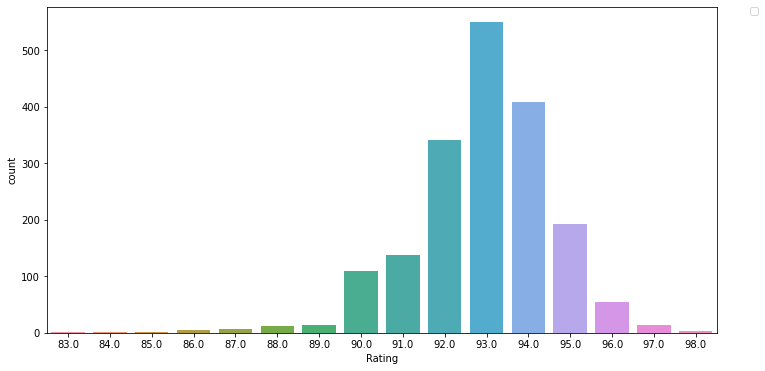

In [82]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

No handles with labels found to put in legend.


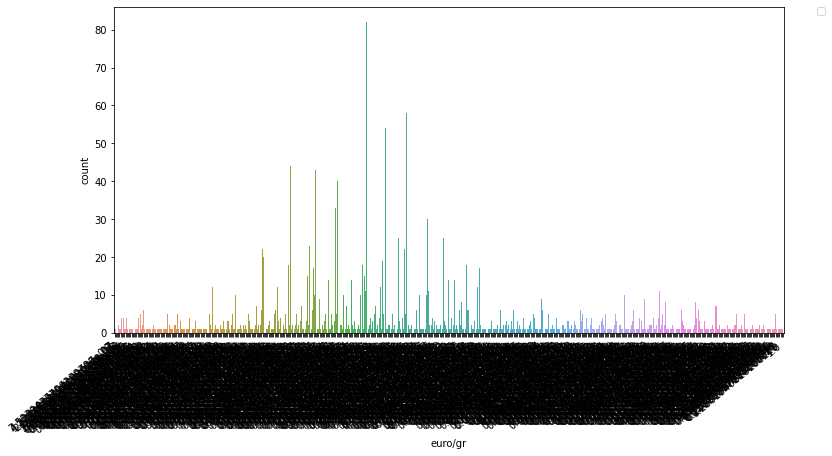

In [121]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df,x='euro/gr')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

No handles with labels found to put in legend.


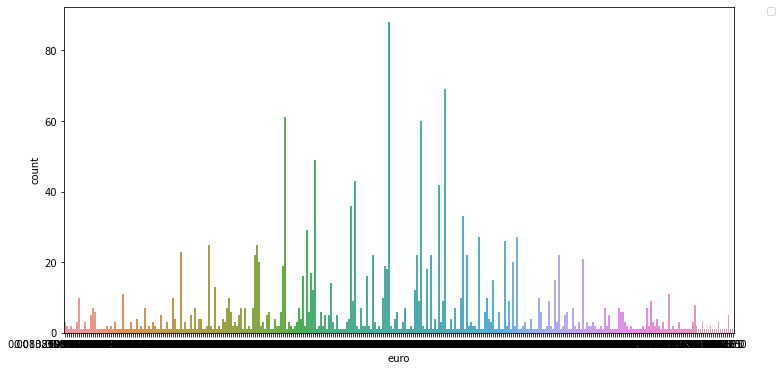

In [84]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='euro')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

No handles with labels found to put in legend.


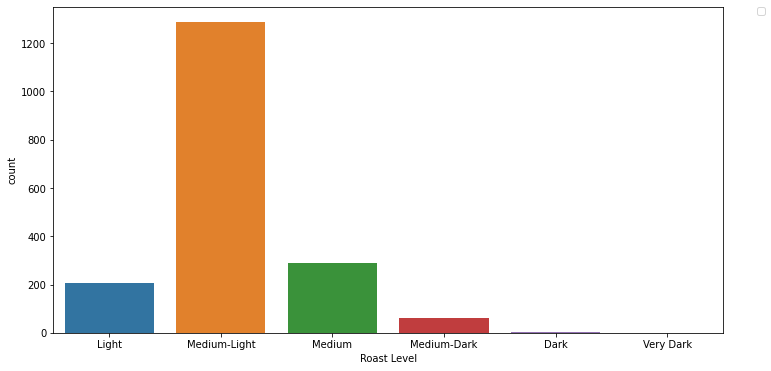

In [85]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Roast Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

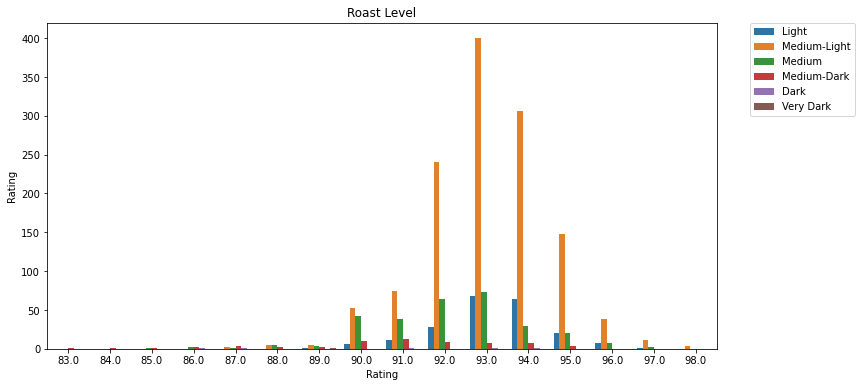

In [86]:
plt.figure(figsize=(12,6))
sns.countplot(x='Rating', hue='Roast Level', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Rating')
plt.title('Roast Level')
plt.show()

In [87]:
roaster_rating = df.nlargest(30, 'Rating')

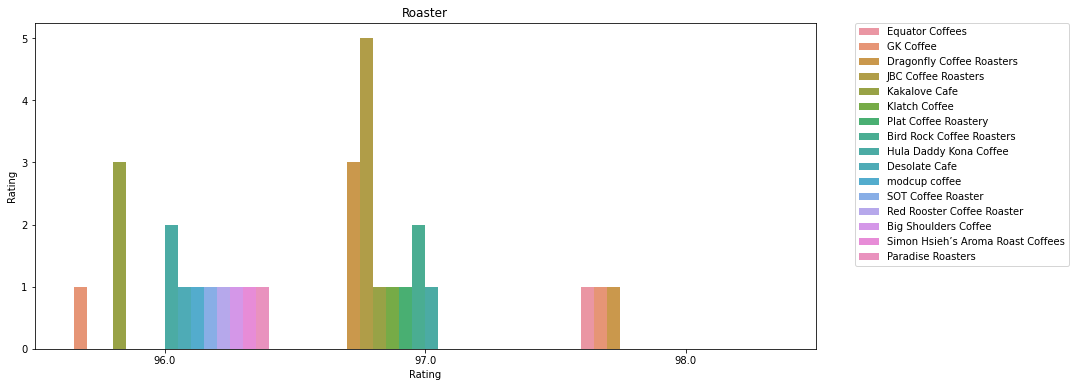

In [88]:
plt.figure(figsize=(14,6))
sns.countplot(x='Rating', hue='Roaster', data=roaster_rating)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Rating')
plt.title('Roaster')
plt.show()

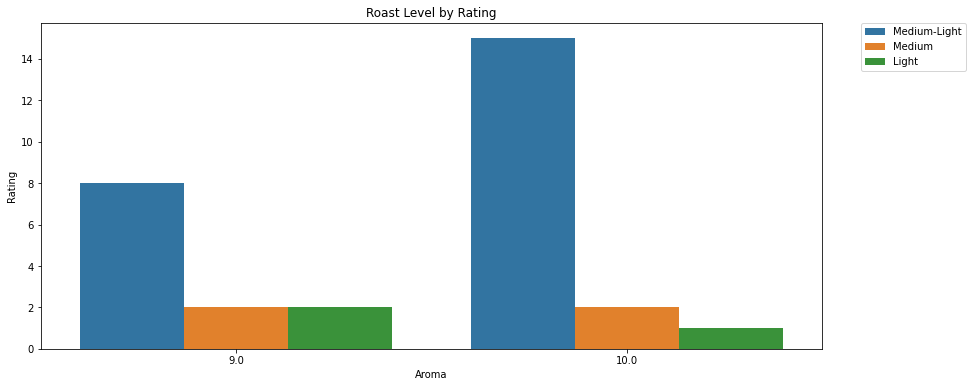

In [89]:
plt.figure(figsize=(14,6))
sns.countplot(x='Aroma', hue='Roast Level', data=roaster_rating)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Rating')
plt.title('Roast Level by Rating')
plt.show()

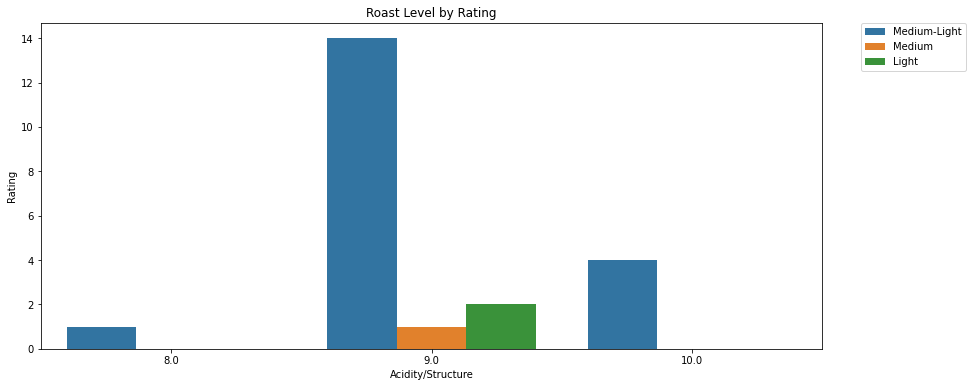

In [90]:
plt.figure(figsize=(14,6))
sns.countplot(x='Acidity/Structure', hue='Roast Level', data=roaster_rating)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Rating')
plt.title('Roast Level by Rating')
plt.show()

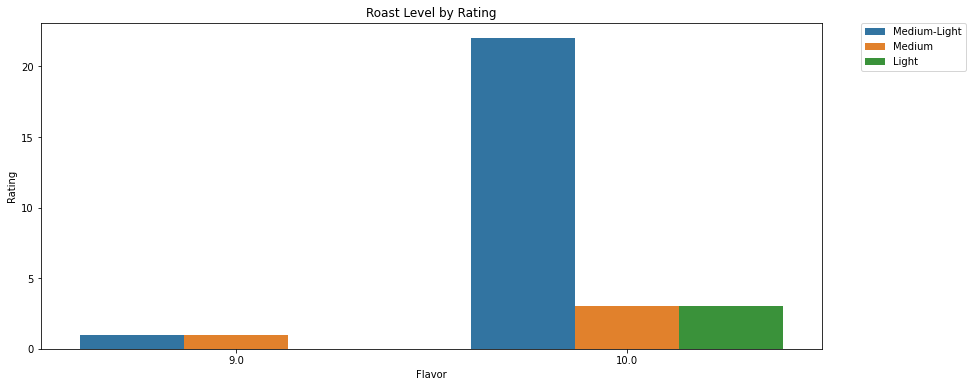

In [91]:
plt.figure(figsize=(14,6))
sns.countplot(x='Flavor', hue='Roast Level', data=roaster_rating)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Rating')
plt.title('Roast Level by Rating')
plt.show()

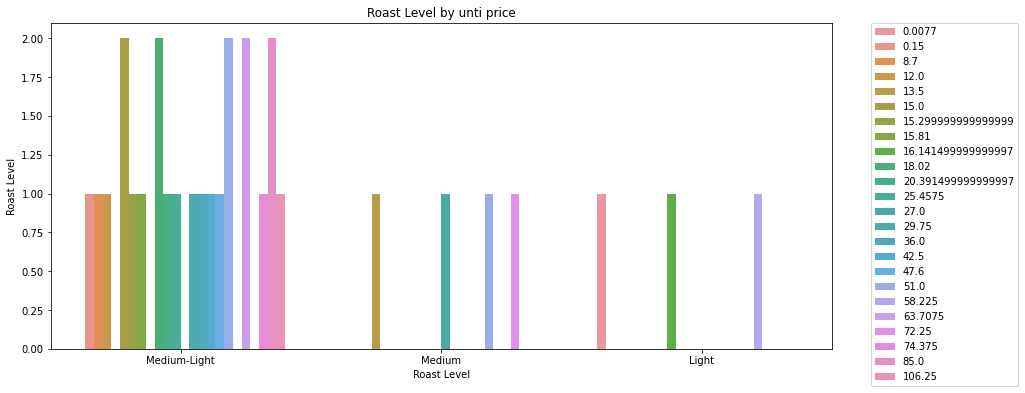

In [92]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='Roast Level', hue='euro', data=roaster_rating)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Roast Level')
plt.title('Roast Level by unti price')
plt.show()

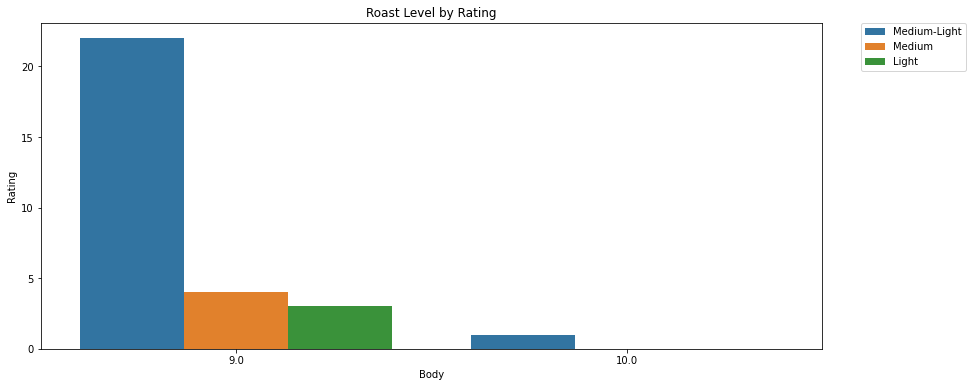

In [93]:
plt.figure(figsize=(14,6))
sns.countplot(x='Body', hue='Roast Level', data=roaster_rating)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Rating')
plt.title('Roast Level by Rating')
plt.show()

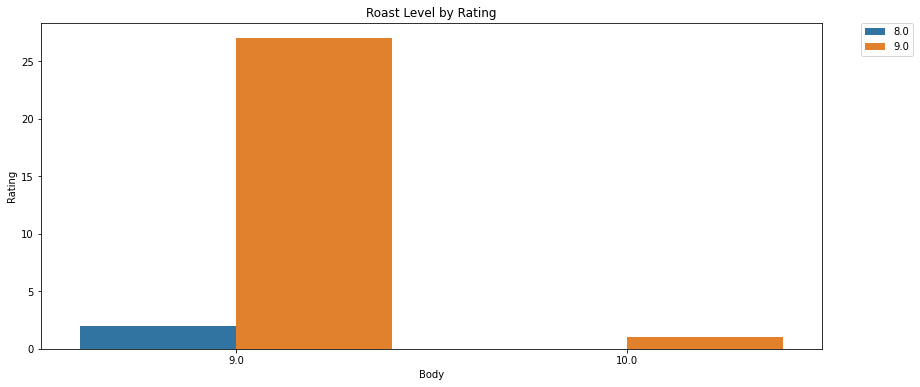

In [94]:
plt.figure(figsize=(14,6))
sns.countplot(x='Body', hue='Aftertaste', data=roaster_rating)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Rating')
plt.title('Roast Level by Rating')
plt.show()

In [95]:
df1 = pd.get_dummies(df, columns = ['Roast Level'])

In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853 entries, 0 to 1919
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Roaster Location          1852 non-null   object 
 1   Coffee Origin             1853 non-null   object 
 2   Review Date               1853 non-null   object 
 3   Aroma                     1850 non-null   float64
 4   Acidity/Structure         1335 non-null   float64
 5   Body                      1850 non-null   float64
 6   Flavor                    1850 non-null   float64
 7   Aftertaste                1850 non-null   float64
 8   Name                      1850 non-null   object 
 9   Roaster                   1850 non-null   object 
 10  Rating                    1850 non-null   float64
 11  quantity2                 1853 non-null   float64
 12  agtron                    1853 non-null   float64
 13  agtron escale             1853 non-null   float64
 14  euro    

In [97]:
roaster_cap= df1[['Roaster', 'euro/gr', 'Roast Level_Dark', 'Roast Level_Light', 'Roast Level_Medium', 'Roast Level_Medium-Dark', 'Roast Level_Medium-Light', 'Roast Level_Very Dark']]
roaster_cap

,Roaster,euro/gr,Roast Level_Dark,Roast Level_Light,Roast Level_Medium,Roast Level_Medium-Dark,Roast Level_Medium-Light,Roast Level_Very Dark
0,Dragonfly Coffee Roasters,0.184919,0,1,0,0,0,0
1,Durango Coffee Company,0.049238,0,0,0,0,1,0
2,NINETYs Roastery,0.064900,0,0,0,0,1,0
3,JBC Coffee Roasters,0.039489,0,1,0,0,0,0
4,Home in Harmony,0.046256,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
1915,Reunion Island Coffee,0.005430,0,0,0,0,1,0
1916,Dragonfly Coffee Roasters,0.059233,0,0,0,0,1,0
1917,Red Rooster Coffee Roaster,0.039489,0,1,0,0,0,0
1918,Red Rooster Coffee Roaster,0.046893,0,0,0,0,1,0


In [98]:
roaster_cap.groupby('Roaster').mean()

,euro/gr,Roast Level_Dark,Roast Level_Light,Roast Level_Medium,Roast Level_Medium-Dark,Roast Level_Medium-Light,Roast Level_Very Dark
Roaster,,,,,,,
1951 Coffee Company,0.050595,0.0,0.000000,0.0,0.0,1.000000,0.0
3-19 Coffee,0.044395,0.0,0.000000,1.0,0.0,0.000000,0.0
4 Plus Coffee,0.090667,0.0,0.000000,0.0,0.0,1.000000,0.0
421 Brew House,0.041957,0.0,0.000000,0.5,0.0,0.500000,0.0
709 Boutique Coffee,0.067500,0.0,0.000000,1.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...
Wolong Coffee Studio,0.091463,0.0,1.000000,0.0,0.0,0.000000,0.0
Wonderstate Coffee,0.049810,0.0,0.181818,0.0,0.0,0.818182,0.0
Yellow Brick Coffee,0.044425,0.0,0.000000,0.0,0.0,1.000000,0.0


In [99]:
roaster_ = df.nlargest(20, 'euro/gr')

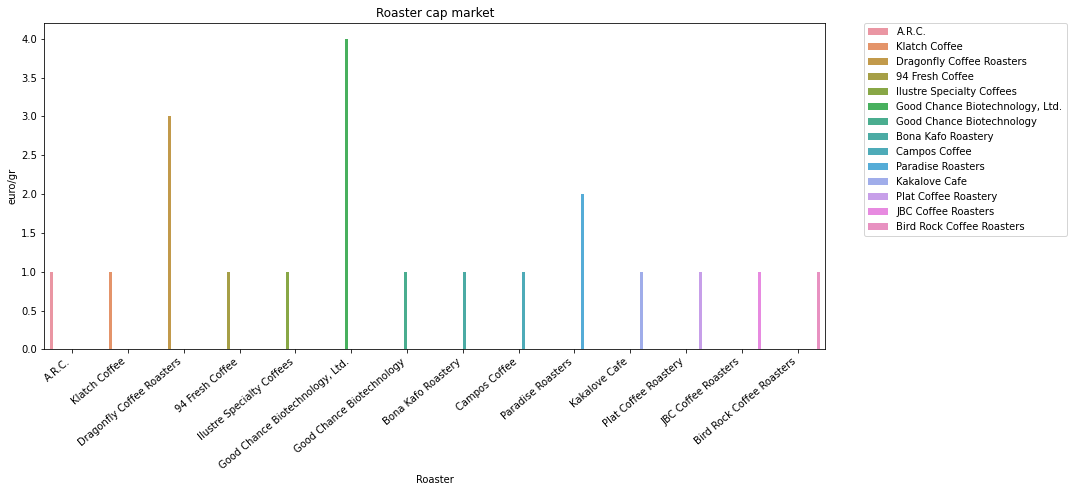

In [100]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='Roaster', hue='Roaster', data=roaster_)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('euro/gr')
plt.title('Roaster cap market')
plt.show()

In [101]:
#roat_cap2= df1[['Roaster', 'euro/gr', 'Roast Level_Dark', 'Roast Level_Light', 'Roast Level_Medium', 'Roast Level_Medium-Dark', 'Roast Level_Medium-Light', 'Roast Level_Very Dark']]

In [102]:
#roat_cap2.groupby('euro/gr').count()

In [103]:
df2_cat=df1.drop(['Roaster Location', 'Coffee Origin', 'Review Date', 'Aroma', 'Acidity/Structure', 'Body', 'Flavor', 'Aftertaste', 'Name', 'Roaster', 'Rating', 'quantity2', 'agtron', 'agtron escale', 'euro', 'euro/gr', 'unit_g'], axis=1, inplace=True)#drop price to

# Multicolinearity

In [104]:
correlations = data_num.corr()


In [105]:
correlations.head()

,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,Rating,quantity2,agtron,agtron escale,euro,unit_g,euro/gr
Aroma,1.000000,0.446369,0.328567,0.520759,0.350723,0.716077,-0.073636,-0.027963,0.261713,0.091949,-0.020157,0.021730
Acidity/Structure,0.446369,1.000000,0.303973,0.387781,0.453897,0.764419,-0.025876,-0.015801,0.338133,0.102926,-0.004045,0.137996
Body,0.328567,0.303973,1.000000,0.337800,0.290367,0.647088,-0.085073,0.033152,0.228605,0.106142,-0.000814,-0.021699
Flavor,0.520759,0.387781,0.337800,1.000000,0.373442,0.695720,-0.131741,-0.044169,0.271934,0.129805,-0.023624,0.019545
Aftertaste,0.350723,0.453897,0.290367,0.373442,1.000000,0.695198,-0.073438,0.003501,0.216208,0.100715,0.019846,0.003829


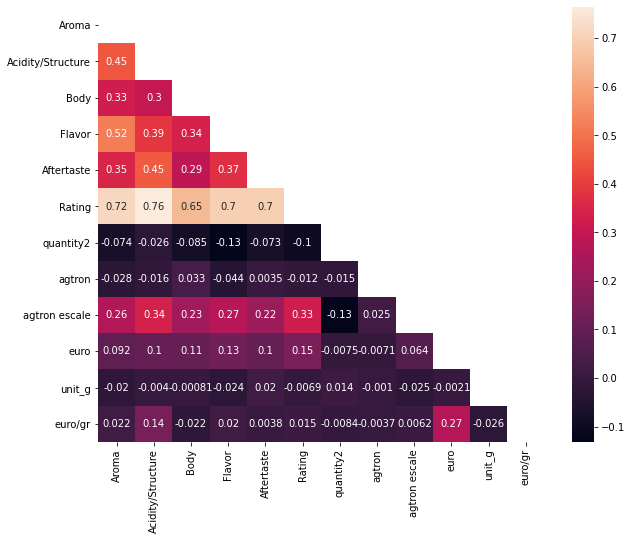

In [106]:
mask=np.zeros_like(data_num.corr())
mask[np.triu_indices_from(mask)]=True


fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data_num.corr(),
            mask=mask,  
            annot=True,
            ax=ax,
                )
plt.show()

In [107]:
data_num.head()

,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,Rating,quantity2,agtron,agtron escale,euro,unit_g,euro/gr
0,9.0,9.0,9.0,9.0,8.0,94.0,8.0,64.0,84.0,42.4575,229.6,0.184919
1,8.0,8.0,8.0,9.0,8.0,91.0,12.0,56.0,74.0,16.9575,344.4,0.049238
2,9.0,8.0,9.0,9.0,8.0,93.0,200.0,56.0,76.0,12.9800,200.0,0.064900
3,9.0,9.0,9.0,9.0,8.0,94.0,12.0,60.0,82.0,13.6000,344.4,0.039489
4,9.0,9.0,9.0,9.0,8.0,94.0,227.0,60.0,78.0,10.5000,227.0,0.046256


In [108]:
data_num.drop(['Rating', 'quantity2'], axis=1)

,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,agtron,agtron escale,euro,unit_g,euro/gr
0,9.0,9.0,9.0,9.0,8.0,64.0,84.0,42.4575,229.6,0.184919
1,8.0,8.0,8.0,9.0,8.0,56.0,74.0,16.9575,344.4,0.049238
2,9.0,8.0,9.0,9.0,8.0,56.0,76.0,12.9800,200.0,0.064900
3,9.0,9.0,9.0,9.0,8.0,60.0,82.0,13.6000,344.4,0.039489
4,9.0,9.0,9.0,9.0,8.0,60.0,78.0,10.5000,227.0,0.046256
...,...,...,...,...,...,...,...,...,...,...
1915,8.0,NaN,9.0,8.0,8.0,54.0,76.0,1.8700,344.4,0.005430
1916,9.0,NaN,9.0,9.0,8.0,56.0,76.0,20.4000,344.4,0.059233
1917,9.0,NaN,8.0,9.0,9.0,65.0,78.0,13.6000,344.4,0.039489
1918,9.0,NaN,9.0,9.0,8.0,54.0,74.0,16.1500,344.4,0.046893


# Pre-processing Data

## Dealing with outliers

In [109]:
q1=np.percentile(df['euro/gr'], 25)   # percentile 25
q3=np.percentile(df['euro/gr'], 75)   # percentile 75

iqr=q3-q1  # IQR

upper=q3+3*iqr   # upper boundary
lower=q1-3*iqr   # lower boundary

In [110]:
len(df[df['euro/gr'] < lower])

0

In [111]:
len(df[df['euro/gr'] > upper])

192

<AxesSubplot:>

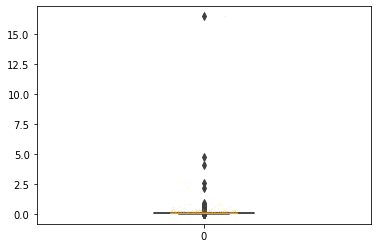

In [112]:
# min-max-scaler
# plot before scaling:
fig, ax = plt.subplots()
sns.boxplot(data=df['euro/gr'], width=.3)
sns.stripplot(data=df['euro/gr'], color="orange", jitter=0.1, size=.5, ax=ax)

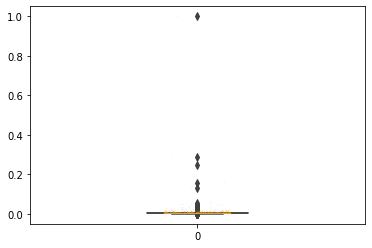

In [113]:
df['euro/gr']=MinMaxScaler().fit_transform(df['euro/gr'].values.reshape(-1, 1))

# plot after scaling
fig, ax = plt.subplots()
sns.boxplot(data=df['euro/gr'], width=.3)
sns.stripplot(data=df['euro/gr'], color="orange", jitter=0.1, size=.5, ax=ax);


In [114]:
df['euro/gr'].head()

0    0.011206
1    0.002982
2    0.003932
3    0.002392
4    0.002802
Name: euro/gr, dtype: float64

In [115]:

robust=RobustScaler().fit(data_num)
X=robust.transform(data_num)

In [116]:
scaled=pd.DataFrame(X)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>]], dtype=object)

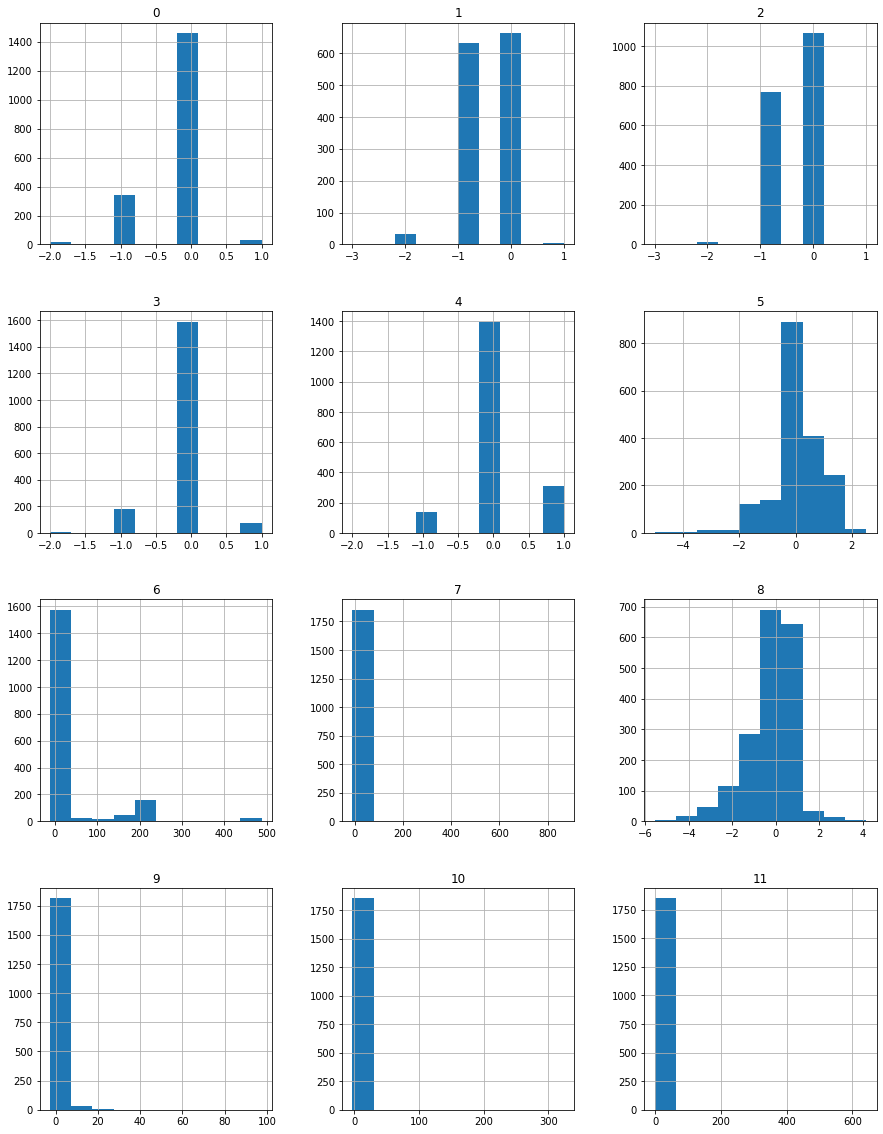

In [117]:
scaled.hist(figsize = (15,20))

## Encoding Categorical Data

In [118]:

#encod_cat= pd.get_dummies(df2_cat, drop_first=false)

In [119]:
#encod_cat.head()

### Concat numerical and categorical Data Frames

In [120]:
data_n = pd.concat([X, data_cat], axis=1).values

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

## Splitting into train set and test set

In [ ]:
# first, split X-y (learning-target data)
X = X.drop(columns=['euro/gr'])
y = data_cat['euro/gr']

In [ ]:
# checking shape
print(X.shape)
print(y.shape)

In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split as tts
import sklearn.model_selection
# train-test-split (4 sets)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size = 0.2 )  # random state fixed sample

# Model Validation

In [ ]:
lm = sklearn.linear_model.LinearRegression()
model = lm.fit( X_train, y_train )
predictions = lm.predict(X_test)
r2 = sklearn.metrics.r2_score( y_test, predictions)
mse = sklearn.metrics.mean_squared_error(  y_test, predictions)
rmse = np.sqrt(mse)
mae = sklearn.metrics.mean_absolute_error(y_test, predictions)

In [ ]:
[print(x) for x in [predictions, mse, rmse, mae]]

In [ ]:
print("predictions: ", predictions)
print("r2 score: ", r2)
print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)

# Reporting

In [ ]:
models[0].coef_

In [ ]:
coeffecients = pd.DataFrame(models[0].coef_,X_train.columns)
coeffecients.columns = ['Coefficient']
coeffecients